## Plotting with categorical data

Categorical scatterplots:

- stripplot() (with kind="strip"; the default)<br>
- swarmplot() (with kind="swarm")

Categorical distribution plots:

- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")

Categorical estimate plots:

- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

catplot()默认使用scatterplot

In [ ]:
tips = sns.load_dataset('tips')

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


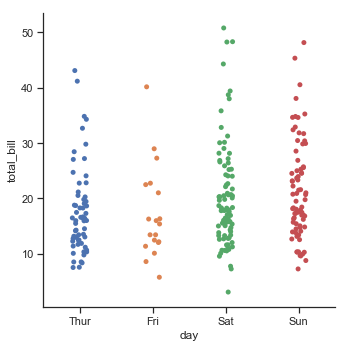

In [4]:
sns.catplot(x='day', y='total_bill', data=tips);

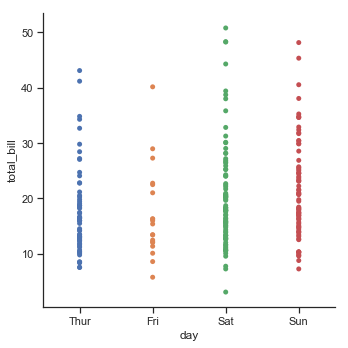

In [5]:
sns.catplot(x='day', y='total_bill', jitter=False, data=tips);

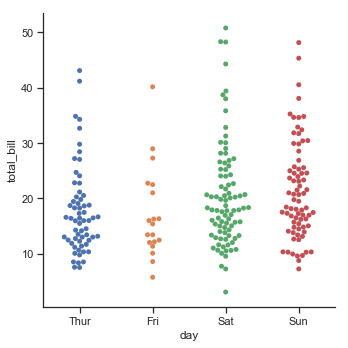

In [6]:
sns.catplot(x='day', y='total_bill', kind='swarm', data=tips);

同样,我们可以通过hue参数增加一个维度

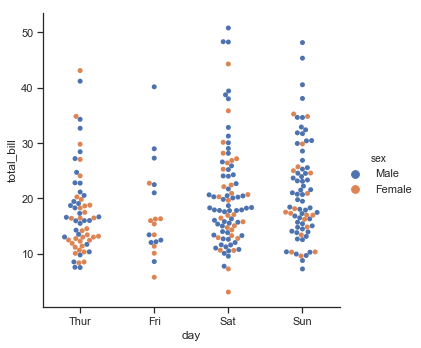

In [7]:
sns.catplot(x='day', y='total_bill', hue='sex', kind='swarm', data=tips);

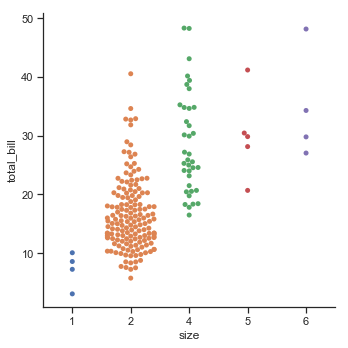

In [8]:
sns.catplot(x='size', y='total_bill', kind='swarm', data=tips.query("size!=3"));

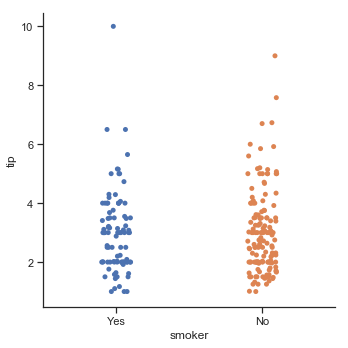

In [11]:
sns.catplot(x='smoker', y='tip', order=['Yes', 'No'], data=tips);

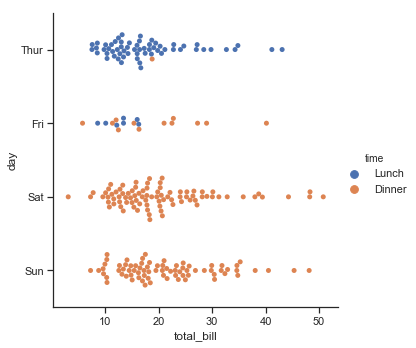

In [13]:
sns.catplot(x='total_bill', y='day', hue='time', kind='swarm', data=tips);

## Boxplots

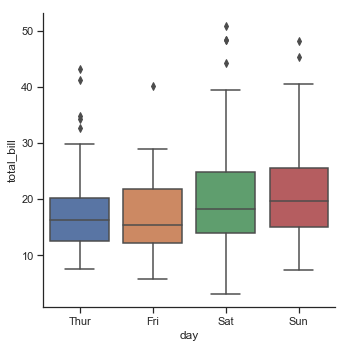

In [15]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips);

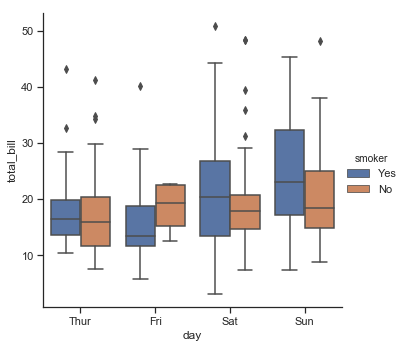

In [16]:
sns.catplot(x='day', y='total_bill', hue='smoker', kind='box', data=tips);

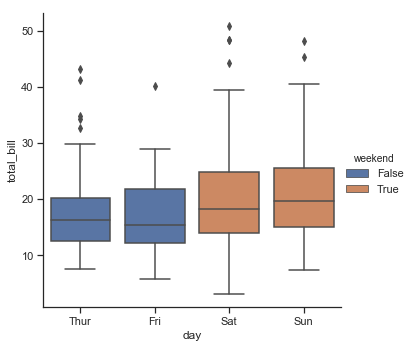

In [18]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x='day', y='total_bill', hue='weekend', 
            kind='box', dodge=False, data=tips);

In [19]:
# A related function, boxenplot(), draws a plot that is similar to a box plot 
# but optimized for showing more information about the shape of the distribution. 
# It is best suited for larger datasets:
diamonds = sns.load_dataset('diamonds')
print(len(diamonds))
diamonds.head()

53940


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


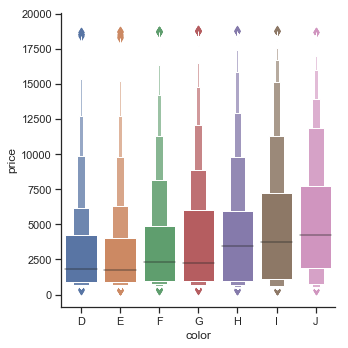

In [21]:
sns.catplot(x='color', y='price', kind='boxen',
            data=diamonds.sort_values("color"));

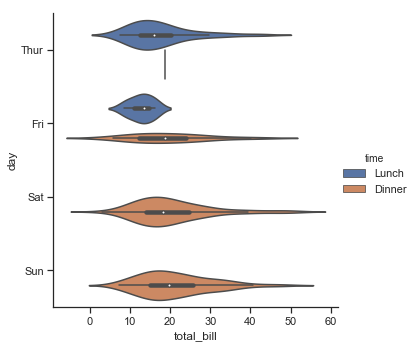

In [22]:
sns.catplot(x="total_bill", y="day", hue="time", kind="violin", data=tips);

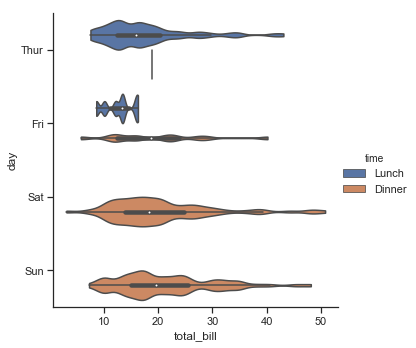

In [23]:
sns.catplot(x="total_bill", y="day", hue="time", 
            kind="violin", bw=.15, cut=0,
            data=tips);

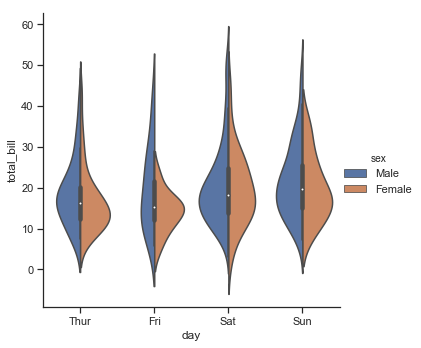

In [24]:
sns.catplot(x="day", y="total_bill", hue="sex", 
            kind="violin", split=True, data=tips);

我们可以将box plot,violin plot与swarmplot(),stripplot()配合使用

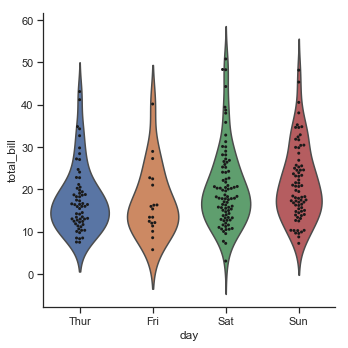

In [27]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color='k', size=3, data=tips, ax=g.ax);

## Bar plots

In [28]:
titanic = sns.load_dataset('titanic')
print(len(titanic))
titanic.head()

891


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


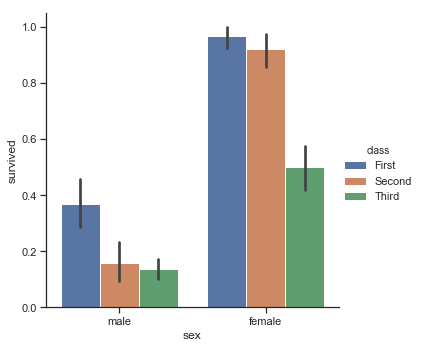

In [32]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

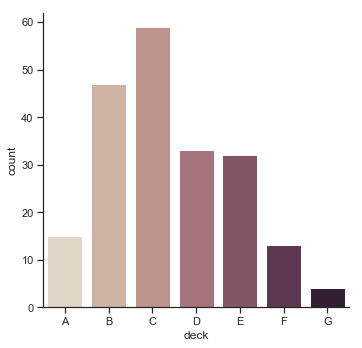

In [34]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

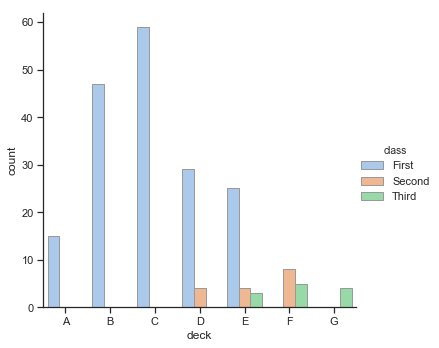

In [35]:
sns.catplot(x="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
             data=titanic);

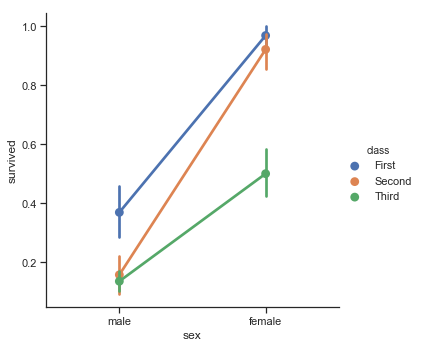

In [37]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

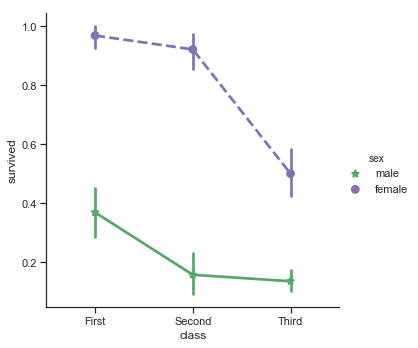

In [40]:
sns.catplot(x="class", y="survived", hue="sex", 
            palette={"male": "g", "female": "m"},
            markers=["*", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

## Plotting “wide-form” data

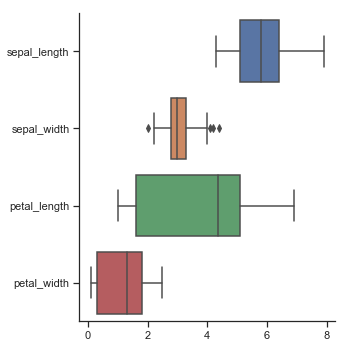

In [41]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");

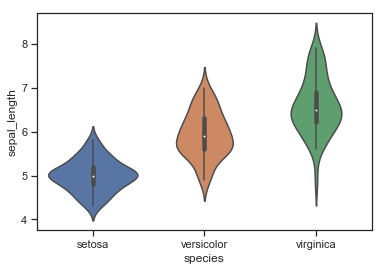

In [42]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

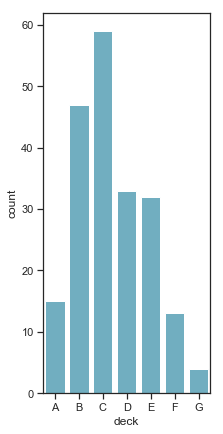

In [45]:
f, ax = plt.subplots(figsize=(3, 7))
sns.countplot(x="deck", data=titanic, color="c");

## Showing multiple relationships with facets

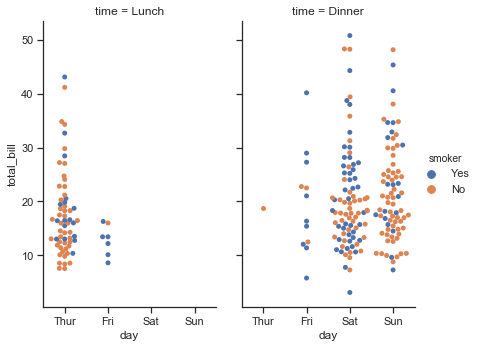

In [47]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

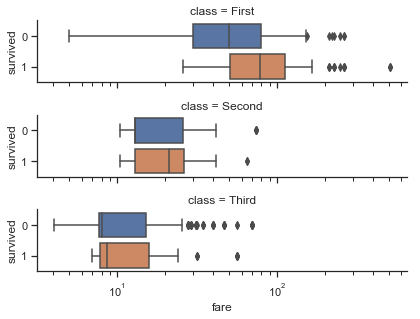

In [50]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");